# Assigment Day 33 Regresion : by Fuad Hasyim

# Data Information

| Kolom       | Deskripsi                                                                    | Penjelasan Sederhana                                                                                                                  |
| ----------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **crim**    | *Per capita crime rate by town*                                              | Tingkat kejahatan per kapita di tiap kota. Semakin tinggi nilainya → lingkungan lebih rawan.                                          |
| **zn**      | *Proportion of residential land zoned for lots over 25,000 sq.ft.*           | Persentase lahan perumahan dengan ukuran besar (>25.000 kaki persegi). Nilai tinggi → daerah elit dengan rumah besar.                 |
| **indus**   | *Proportion of non-retail business acres per town*                           | Persentase lahan untuk industri (bukan ritel). Nilai tinggi → daerah lebih industri daripada perumahan.                               |
| **chas**    | *Charles River dummy variable (=1 if tract bounds river; 0 otherwise)*       | Variabel biner: `1` jika wilayah berbatasan dengan Sungai Charles, `0` jika tidak. Rumah dekat sungai biasanya lebih mahal.           |
| **nox**     | *Nitric oxides concentration (parts per 10 million)*                         | Tingkat polusi udara (NOx). Nilai tinggi → udara lebih tercemar.                                                                      |
| **rm**      | *Average number of rooms per dwelling*                                       | Rata-rata jumlah kamar per rumah. Nilai tinggi → rumah lebih besar dan biasanya lebih mahal.                                          |
| **age**     | *Proportion of owner-occupied units built prior to 1940*                     | Persentase rumah yang dibangun sebelum tahun 1940. Nilai tinggi → kawasan lebih tua.                                                  |
| **dis**     | *Weighted distances to five Boston employment centers*                       | Jarak rata-rata ke 5 pusat pekerjaan utama di Boston. Nilai tinggi → lokasi lebih jauh dari pusat kota.                               |
| **rad**     | *Index of accessibility to radial highways*                                  | Indeks aksesibilitas ke jalan raya utama. Nilai tinggi → lebih mudah ke jalan besar.                                                  |
| **tax**     | *Full-value property tax rate per *$10,000*                                  | Tarif pajak properti per $10.000 nilai rumah. Nilai tinggi → pajak rumah di area itu mahal.                                           |
| **ptratio** | *Pupil–teacher ratio by town*                                                | Rasio murid terhadap guru di sekolah daerah tersebut. Nilai rendah → kualitas pendidikan lebih baik.                                  |
| **black**   | ( 1000(Bk − 0.63)^2 ) di mana **Bk** adalah proporsi penduduk berkulit hitam | Indikator sosial/demografis. (Perlu diingat: fitur ini bersejarah dan kini dianggap tidak etis digunakan dalam model prediksi nyata). |
| **lstat**   | *% lower status of the population*                                           | Persentase populasi berstatus ekonomi rendah. Nilai tinggi → area cenderung lebih miskin.                                             |
| **medv**    | *Median value of owner-occupied homes in $1000s*                             | **Nilai median harga rumah (dalam ribuan dolar)** → ini adalah **target (variabel yang ingin diprediksi)**.                           |


# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preliminary Flow

In [ ]:
# Load Dataset
df_boston = pd.read_csv('/content/drive/MyDrive/DATA SET/boston.csv')

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
print(df_boston.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


tidak ada missing values

In [ ]:
duplicated = df_boston.duplicated().sum()
duplicated

np.int64(0)

tidak ada duplicate

In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Train-Validation-Test Split

**Persiapan Data**
* Bagi dataset menjadi set pelatihan, validasi, dan pengujian.
* Pastikan tidak ada nilai yang hilang dalam dataset.
* Lakukan analisis eksplorasi awal untuk memahami distribusi data.

In [ ]:
X = df_boston.drop(columns='medv') # drop kolom medv biar X tidak mencontek karena kita akan melatih data agar bisa menjawab harga
y = df_boston['medv']

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Split Data menjadi Train + Test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

| Subset                     | Persentase | Tujuan                                                                           |
| -------------------------- | ---------- | -------------------------------------------------------------------------------- |
| `X_pretrain`, `y_pretrain` | 80%        | Digunakan untuk melatih & validasi model (sementara)                             |
| `X_test`, `y_test`         | 20%        | Digunakan **hanya sekali** di akhir untuk mengukur performa model pada data baru |


Jadi setelah baris pertama ini, data masih dibagi dua: pretrain (80%) dan test (20%).

In [ ]:
X_pretrain.shape

(404, 13)

split pertama dari total data 506 rows untuk X dan y pretain adalah sebanyak 404 rows

In [ ]:
# Split Pretrain menjadi Train + Validation
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.2, random_state=42)

Ambil 80% data pretrain tadi dan bagi lagi menjadi:

Train set (80% dari 80%) = 64% total data

Validation set (20% dari 80%) = 16% total data

| Subset               | Persentase dari total | Kegunaan                                                            |
| -------------------- | --------------------- | ------------------------------------------------------------------- |
| `X_train`, `y_train` | 64%                   | Untuk **melatih model**                                             |
| `X_val`, `y_val`     | 16%                   | Untuk **mengevaluasi dan menyetel parameter model**                 |
| `X_test`, `y_test`   | 20%                   | Untuk **uji akhir performa model** (tidak disentuh selama training) |


| Jenis Data         | Kapan digunakan          | Tujuan                                                |
| ------------------ | ------------------------ | ----------------------------------------------------- |
| **Train set**      | Saat training            | Model belajar pola dari data                          |
| **Validation set** | Saat tuning              | Mengecek apakah model overfitting atau underfitting   |
| **Test set**       | Setelah training selesai | Mengukur performa model di data yang benar-benar baru |


In [ ]:
X_train.shape

(323, 13)

In [ ]:
y_train.shape

(323,)

In [ ]:
X_test.shape

(102, 13)

In [ ]:
X_val.shape

(81, 13)

split kedua X_train sebanyak 323 rows dan X_test sebanyak 102 rows dan X val sebanyak 81 rows sehingga kalau di total semuanya menjadi 506 rows sesuai .info()

# Memahami hubungan antar fitur (variabel X)

**Analisis Korelasi dan Seleksi Fitur**
* Buat correlation plot untuk memahami hubungan antar variabel.
* Identifikasi fitur yang memiliki korelasi tinggi untuk menghindari multicollinearity.
* Lakukan seleksi fitur berdasarkan analisis yang telah dilakukan.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

feature_medv = add_constant(X_train)

vif_df = pd.DataFrame([vif(feature_medv.values, i)
               for i in range(feature_medv.shape[1])],
              index = feature_medv.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


nilai VIF yang diatas 3 berpotensi memiliki hubungan kuat antar fitur, ketika ada hubungan kuat antar fitur maka akan berdampak pada model, model akan bingung untuk mencari koefisiennya

There are several features with high VIF scores:

* indus
* nox
* age
* dis
* rad
* tax
* istat

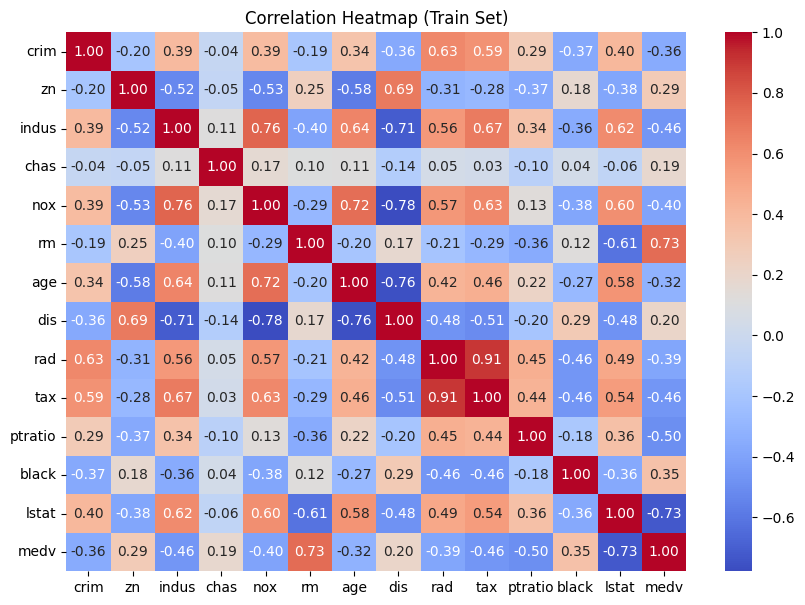

In [ ]:
# heatmap correlation
medv_train = pd.concat([X_train, y_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Train Set)")
plt.show()

There are several features with high VIF scores:

* indus
* nox
* age
* dis
* rad
* tax
* istat

dari semua data diatas sisakan data yang korelasinya paling tinggi dengan kolom target (medv) sehingga kita buang semua kecuali istat karena korelasinya paling tinggi (-0,73)

In [ ]:
medv_train.shape

(323, 14)

# Feature selection (pemilihan fitur)

In [ ]:
# # Hilangkan fitur yang sangat berkorelasi: 'rad' dan 'tax' (highly correlated)
cols_drop = ['rad', 'nox', 'age', 'dis', 'indus', 'tax']

X_train = X_train.drop(columns=cols_drop)
X_val = X_val.drop(columns=cols_drop)
X_test = X_test.drop(columns=cols_drop)

Semua subset (train, val, test) harus punya kolom yang sama supaya model tidak error saat evaluasi nanti.

## Rechek VIF

In [ ]:
feature_medv = add_constant(X_train)

vif_df = pd.DataFrame([vif(feature_medv.values, i)
               for i in range(feature_medv.shape[1])],
              index = feature_medv.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.321007
2,zn,1.277058
3,chas,1.029369
4,rm,1.717556
5,ptratio,1.330968
6,black,1.257787
7,lstat,2.132980


# Model Training

**Pelatihan Model**
* Gunakan regresi Ridge dan Lasso dengan berbagai nilai lambda untuk melatih model.
* Lakukan validasi untuk memilih nilai lambda terbaik menggunakan metrik RMSE.
* Bandingkan performa model pada set validasi.

## Train Ridge Models

In [ ]:
from sklearn.linear_model import Ridge

# train the model
feature_medv_train = X_train.to_numpy()
target_medv_train = y_train.to_numpy()
target_medv_train = target_medv_train.reshape(len(target_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(feature_medv_train, target_medv_train)
ridge_reg_pointone.fit(feature_medv_train, target_medv_train)
ridge_reg_one.fit(feature_medv_train, target_medv_train)
ridge_reg_ten.fit(feature_medv_train, target_medv_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha) / lambda

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_val = X_val.to_numpy()
y_medv_val = y_val.to_numpy()
y_medv_val = y_medv_val.reshape(len(y_medv_val),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_val)
    rmse = np.sqrt(mean_squared_error(y_medv_val,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.072568142964353
RMSE of Ridge regression model with alpha = 0.1 is 5.071804258896328
RMSE of Ridge regression model with alpha = 1.0 is 5.064399359342003
RMSE of Ridge regression model with alpha = 10 is 5.006917419058389


We can see that Ridge with `alpha=10` has the smalles RMSE --> The best model

## coefisient Ridge

In [ ]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.504416
1,crim,-0.047137
2,zn,-0.020084
3,chas,3.251214
4,rm,5.660251
5,ptratio,-0.832807
6,black,0.013025
7,lstat,-0.455531


## Train Lasso Models

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = X_train.to_numpy()
y_medv_train = y_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
# 4 models with 4 different alphas (lambda)

# fit the model (training)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_val = X_val.to_numpy()
y_medv_val = y_val.to_numpy()
y_medv_val = y_medv_val.reshape(len(y_medv_val),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_val)
    rmse = np.sqrt(mean_squared_error(y_medv_val,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.068007147397786
RMSE of Lasso regression model with alpha = 0.1 is 5.038252672890048
RMSE of Lasso regression model with alpha = 1.0 is 4.884214793644861
RMSE of Lasso regression model with alpha = 10 is 5.436607276239636


We can see that Lasso with `alpha=1.0` has the smalles RMSE --> The best model

In [ ]:
# coeffs
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.703742
1,crim,-0.046948
2,zn,-0.020186
3,chas,3.109938
4,rm,5.637118
5,ptratio,-0.833866
6,black,0.013021
7,lstat,-0.457238


## Best Models

In [ ]:
best_ridge = Ridge(alpha=10)
best_ridge.fit(X_train, y_train)

best_lasso = Lasso(alpha=1, max_iter=10000)
best_lasso.fit(X_train, y_train)

Lasso(alpha=1, max_iter=10000)

## Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

print('R-squared for training data is {}'.format(r2_score(y_train, y_pred_train)*100))
print('R-squared for testing data is {}'.format(r2_score(y_test, y_pred_test)*100))
print('R-squared for val data is {}'.format(r2_score(y_val, y_pred_val)*100))

R-squared for training data is 72.81255659506004
R-squared for testing data is 58.45749619691502
R-squared for val data is 63.80893101363559


Gap antara train dan test adalah 14, terindikasi overfitting karena mungkin model terlalu menyesuaikan data train karena datanya terlalu sedikit.

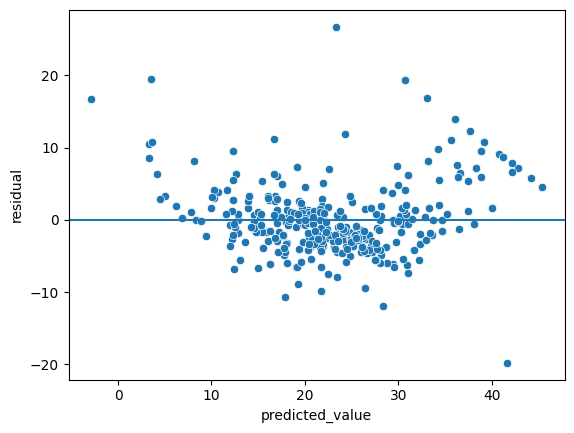

In [ ]:
# calculate residuals
residual = y_train - y_pred_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_pred_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Cek asumsi:

* Linear relationship: Rather OK (Tidak tampak pola non-linear)
* Variance konstan: NO. (Ada sedikit heteroskedastisitas di nilai tinggi)
* Residual independent: Yes. (Tidak tampak pola berurutan)

# Model Interpretation

In [ ]:
ridge = Ridge(alpha=10, random_state=42)
lasso = Lasso(alpha=1, max_iter=10000, random_state=42)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Step: Create DataFrame for coefficient comparison
ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns)
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)

coef_compare = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge Coef': ridge_coefs,
    'Lasso Coef': lasso_coefs
})

# Step: Add indicator to show which features are dropped by Lasso
coef_compare['Lasso Dropped?'] = coef_compare['Lasso Coef'] == 0.0

# Show the result
display(coef_compare.sort_values('Lasso Dropped?', ascending=False))

,Feature,Ridge Coef,Lasso Coef,Lasso Dropped?
chas,chas,2.279306,0.000000,True
crim,crim,-0.044426,-0.028582,False
zn,zn,-0.021479,-0.015390,False
rm,rm,5.187088,2.940897,False
ptratio,ptratio,-0.867930,-0.805332,False
black,black,0.012693,0.011652,False
lstat,lstat,-0.487948,-0.626973,False


# Evaluation

In [ ]:
# STEP: Evaluation on Test Set
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Ridge Test Evaluation
y_pred_ridge = best_ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Lasso Test Evaluation
y_pred_lasso = best_lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Display Evaluation Results
evaluation_df = pd.DataFrame({
    "Model": ["Ridge (α=10)", "Lasso (α=1)"],
    "MAE": [ridge_mae, lasso_mae],
    "MAPE (%)": [ridge_mape, lasso_mape],
    "RMSE": [ridge_rmse, lasso_rmse],
    "R²": [ridge_r2, lasso_r2]
})

print("Evaluation on Test Set:\n", evaluation_df)


Evaluation on Test Set:
           Model       MAE   MAPE (%)      RMSE        R²
0  Ridge (α=10)  3.383997  18.015162  5.461481  0.593260
1   Lasso (α=1)  3.571943  18.387953  5.339076  0.611288


Jadi secara keseluruhan, Lasso (α=1) sedikit lebih baik dan lebih seimbang, karena:

R² lebih tinggi (lebih baik menjelaskan hubungan),

RMSE lebih kecil (lebih stabil terhadap error besar),

Dan perbedaan MAE/MAPE sangat kecil.

Regresi ini memberikan hasil prediksi yang baik dan juga menghilangkan fitur-fitur yang kurang penting, sehingga modelnya lebih mudah dipahami.